In [1]:
import pandas as pd 
import numpy as np 

# Dealing and exploring the data

### Shaping, Standardizing, Dealing with NaN values, Adding and creating columns 

In [24]:
data = pd.read_csv('marketing_customer_analysis.csv') #getting the data

In [25]:
data.shape #shaping 

(9134, 24)

In [26]:
#Standardizing header names
cols=[]
for c in data.columns:
    cols.append(c.lower())
data.columns=cols 

In [28]:
data=data.drop(data.columns[0], axis=1) #dropping first column because it contains alot of unique data

In [30]:
#numer columns 

numer_cols=data.select_dtypes(include=['float','int']).columns.tolist()

In [32]:
#object cols

cat_cols=data.select_dtypes(include=['object']).columns.tolist()

In [37]:
#Check and deal with `NaN` values

data.isna().sum()

#no NAN value with this data, if there was we use this code expl:
#data['vehicle class'] = data['vehicle class'].fillna('Four-Door Car') 

In [42]:
#Datetime format - Extract the months from the dataset and store in a separate column.

data['effective to date'] = pd.to_datetime(data['effective to date']) #converting the column effective to date to datetime
data['Month']=data['effective to date'].dt.strftime('%B') #creating column Month 


In [43]:
data['Month'] #showing the column Month 

0       February
1        January
2       February
3        January
4       February
          ...   
9129    February
9130    February
9131    February
9132    February
9133    February
Name: Month, Length: 9134, dtype: object

In [45]:
data.info() #getting the data Info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   state                          9134 non-null   object        
 1   customer lifetime value        9134 non-null   float64       
 2   response                       9134 non-null   object        
 3   coverage                       9134 non-null   object        
 4   education                      9134 non-null   object        
 5   effective to date              9134 non-null   datetime64[ns]
 6   employmentstatus               9134 non-null   object        
 7   gender                         9134 non-null   object        
 8   income                         9134 non-null   int64         
 9   location code                  9134 non-null   object        
 10  marital status                 9134 non-null   object        
 11  monthly premium a

In [48]:
# showing datFrame description 

data.describe()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


## Creating plots 


In [52]:
data.describe().T 

,count,mean,std,min,25%,50%,75%,max
customer lifetime value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly premium auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months since last claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months since policy inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number of open complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number of policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
total claim amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


In [50]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [53]:
#value counts

data['response'].value_counts()

No     7826
Yes    1308
Name: response, dtype: int64

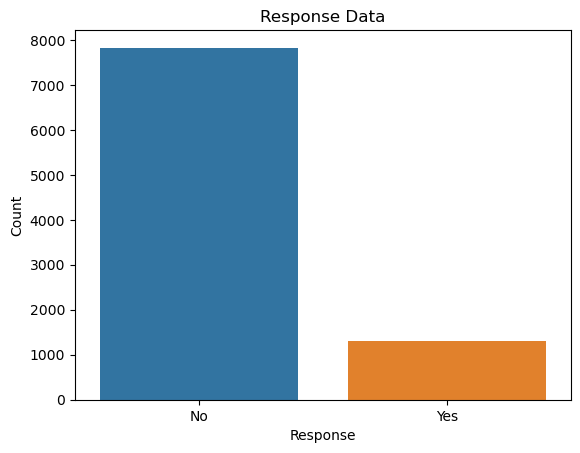

In [54]:
##Show a plot of the total number of responses

sns.countplot(data=data, x='response')
plt.title('Response Data')
plt.xlabel('Response')
plt.ylabel('Count')
plt.show()

<AxesSubplot:xlabel='sales channel', ylabel='response_rate'>

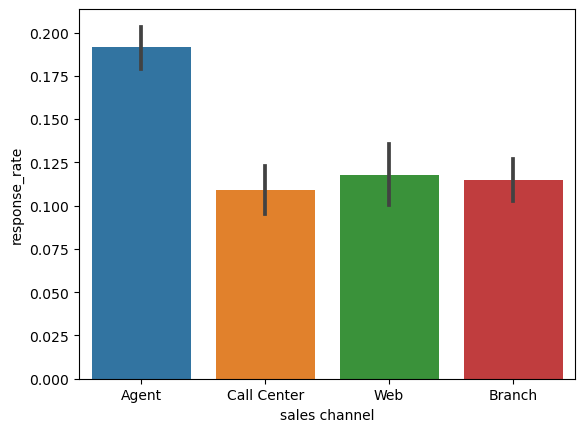

In [55]:
##Show a plot of the response rate by the sales channel.

### First I convert Yes and No to 1 and O 
data['response_rate']=np.where(data['response']=='Yes',1,0) 

### Then I create my barplot with X is sales channel and Y response rate above
sns.barplot(x="sales channel", y="response_rate", data=data)

,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,location code,...,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,Month,response_rate,total claim amount range,income range
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,February,0,0-500,1000-1500
1,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,...,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,January,0,500-1000,0-500
2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,February,0,0-500,1000-1500
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,January,0,0-500,0-500
4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,February,0,0-500,1000-1500


<AxesSubplot:xlabel='total claim amount range', ylabel='response_rate'>

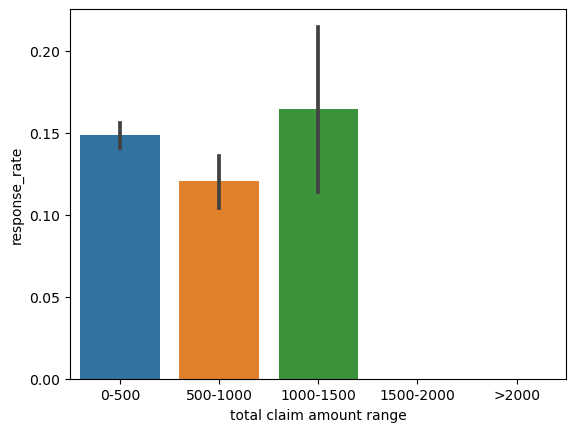

In [62]:
##Show a plot of the response rate by the total claim amount and Income.

### first I created the bins 
cut_labels_5 = ['0-500', '500-1000', '1000-1500', '1500-2000', '>2000']
bin1 = pd.cut(data['total claim amount'], labels=cut_labels_5, bins=5)
data['total claim amount range'] = bin1
bin2 = pd.cut(data['income'],labels=cut_labels_5, bins=5)
data['income range'] = bin2
display(data.head())

### Creating slots 
sns.barplot(x="total claim amount range", y="response_rate", data=data)
#sns.barplot(x="income range", y="response_rate", data=data)




### Processing Data

#### Plots

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [65]:
## getting the numerical and cat data into 2 dataframes

numerical = data.select_dtypes(include=['int', 'float'])
categorical = data.select_dtypes(include=['object'])

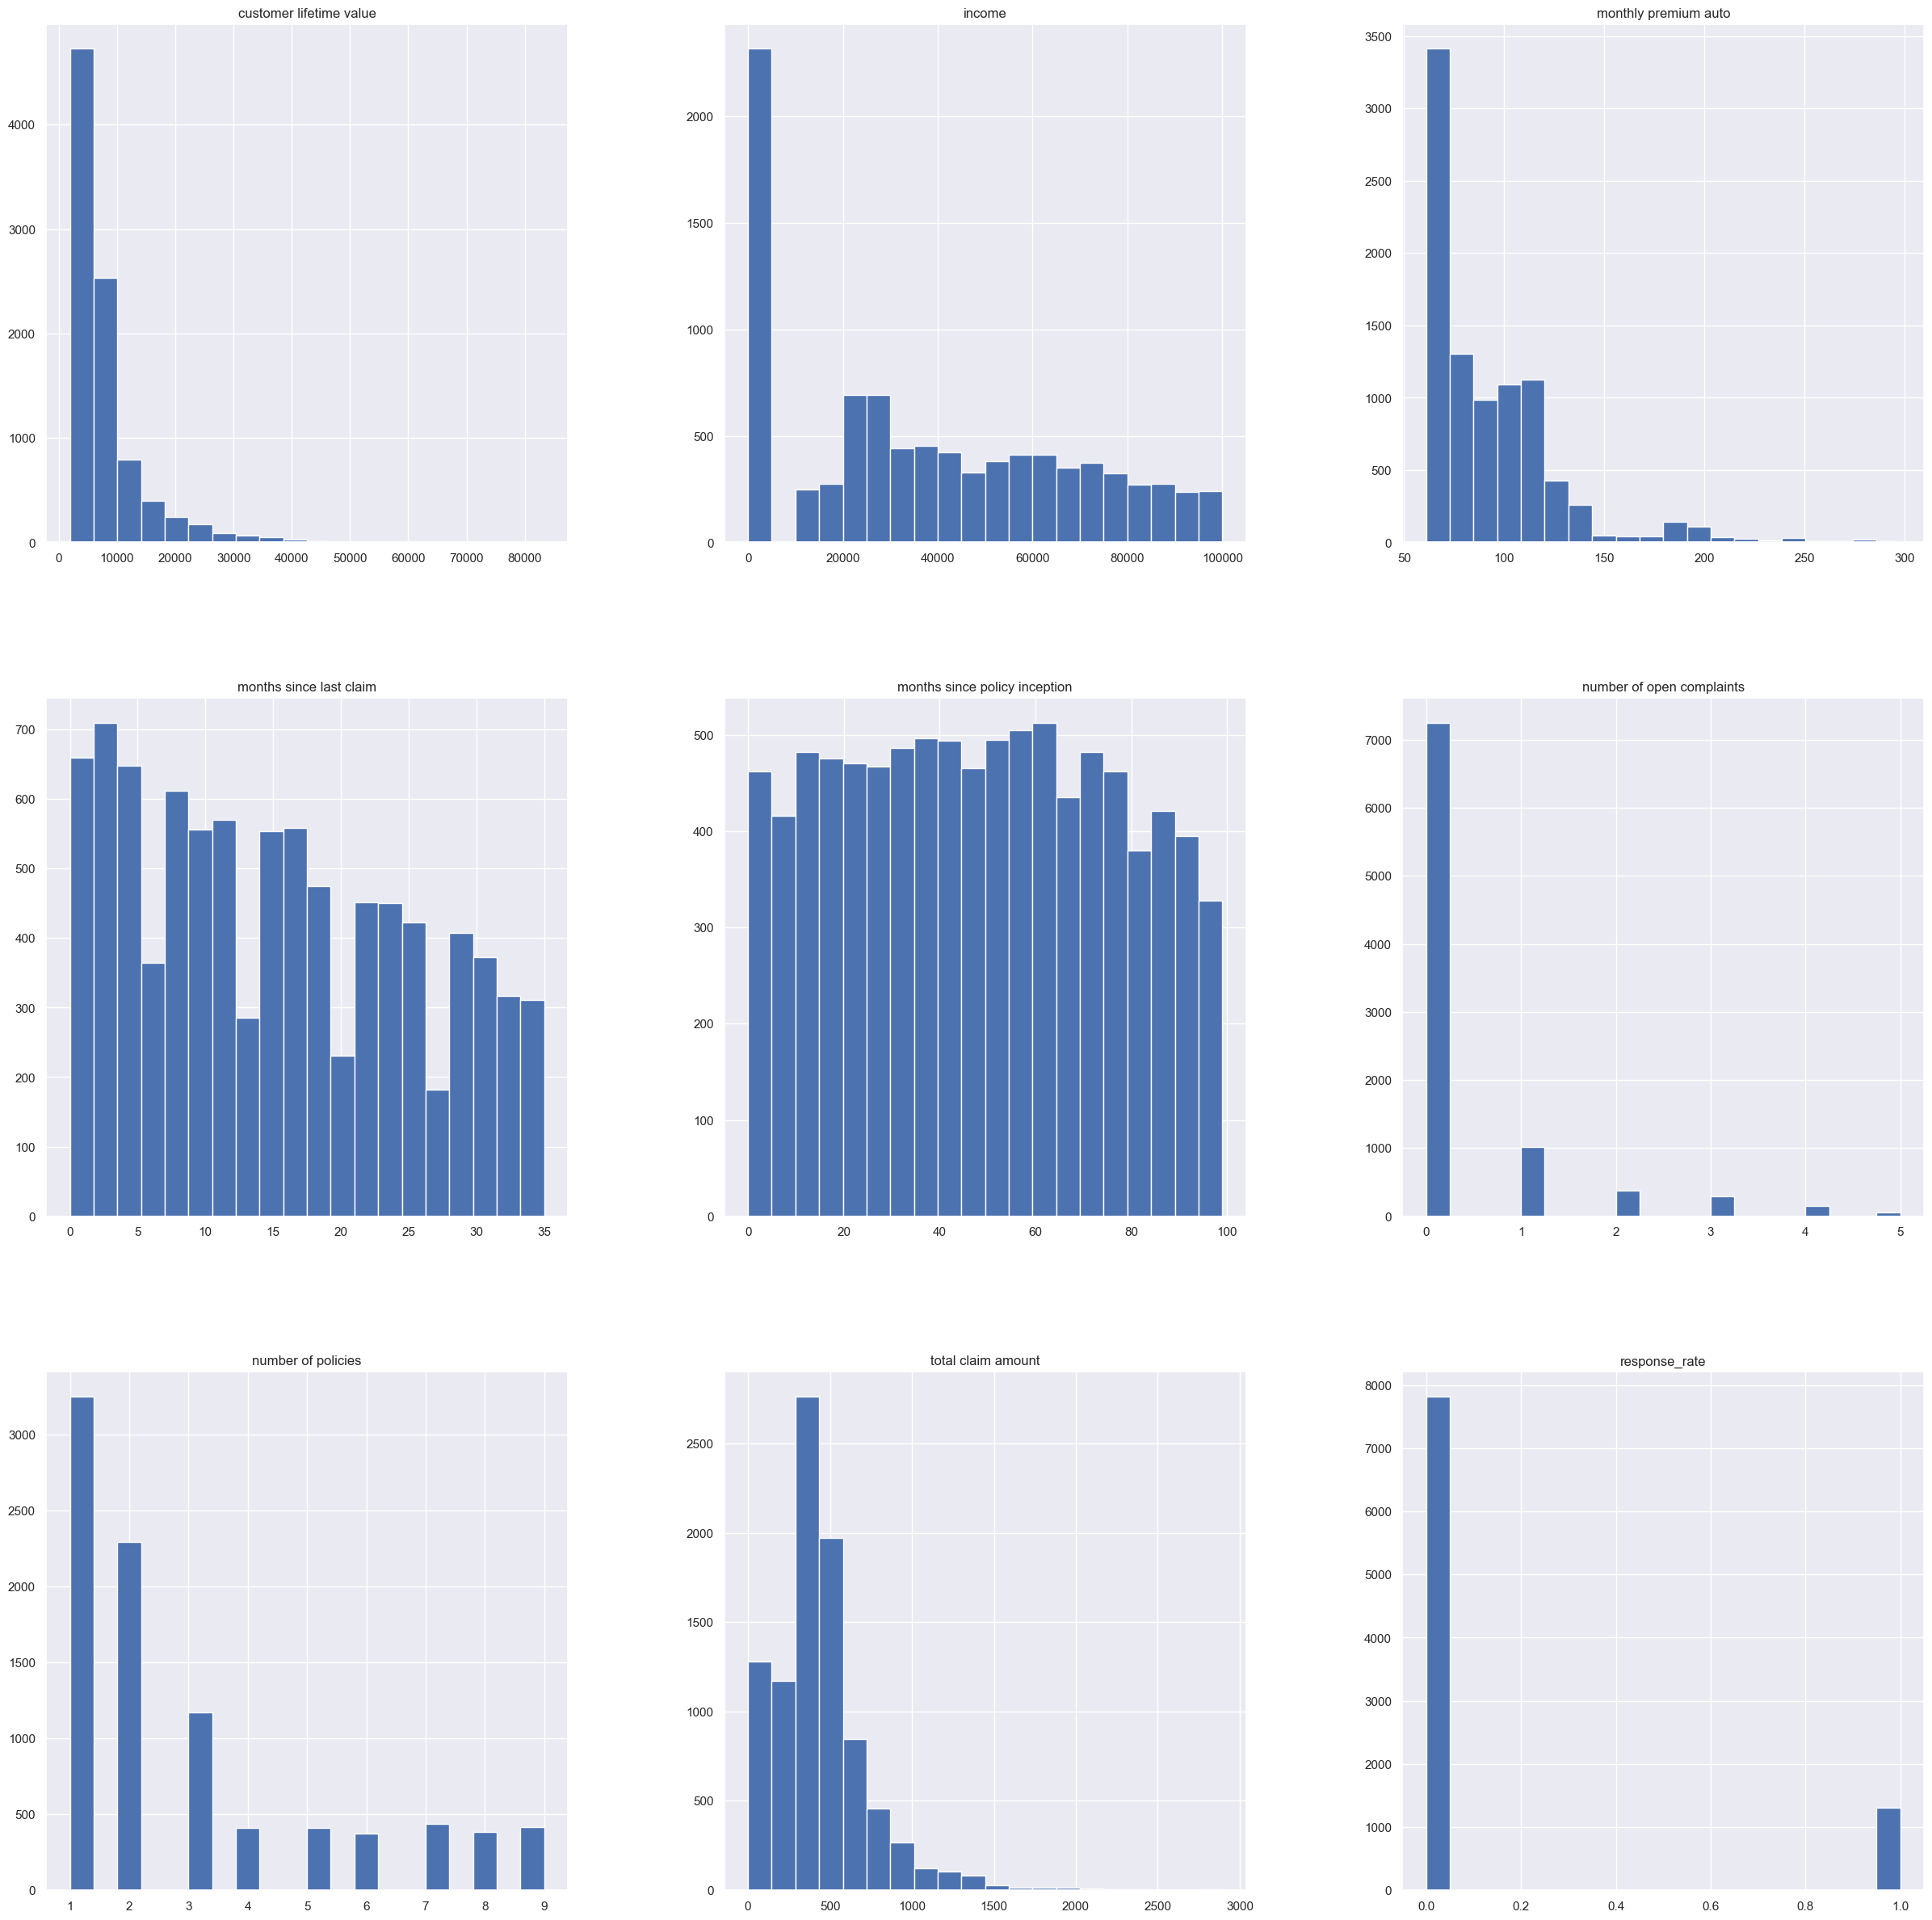

In [73]:
### here we will checking for normal distrubution through looking and histrogramsfor numerical

numerical.hist(bins=20)
sns.set(rc={'figure.figsize':(30,30)})

#### correlation 

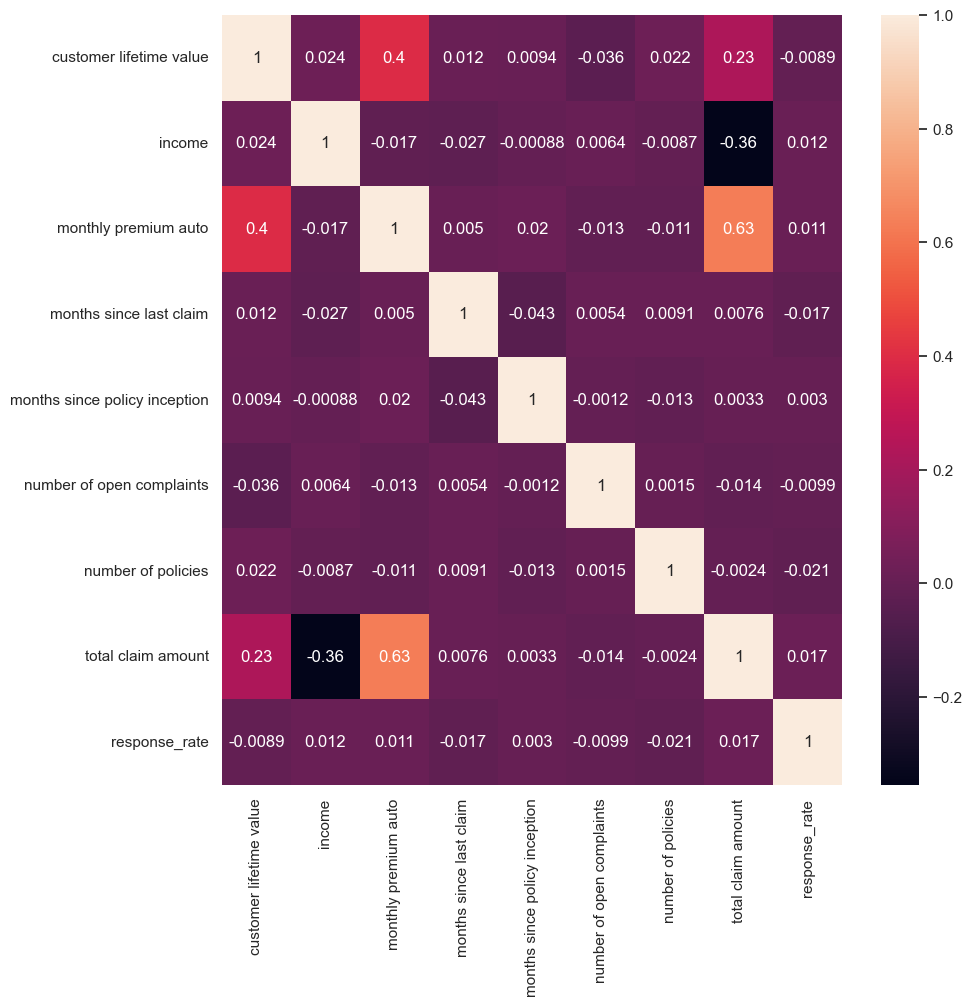

In [78]:
###check the multicollinearity between the features
correlations_matrix = numerical.corr()
#correlations_matrix
fig, ax=plt.subplots(figsize=(10,10))
sns.heatmap(correlations_matrix, annot=True)
plt.show()

## we normally drop strong corr 

#### X-y split.

In [79]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [81]:
%%time

y = numerical['total claim amount']
X = numerical.drop(['total claim amount'], axis=1)
lm = linear_model.LinearRegression()
lm.fit(X2,y)
print(lm2.score(X2,y))
y_pred = lm2.predict(X2)
print(mean_squared_error(y_pred,y))

0.5188549047047024
40599.535174556135
CPU times: user 39.2 ms, sys: 16.9 ms, total: 56.1 ms
Wall time: 18.6 ms


#### Normalize (numerical) (MinMAx)

In [82]:
from sklearn.preprocessing import MinMaxScaler

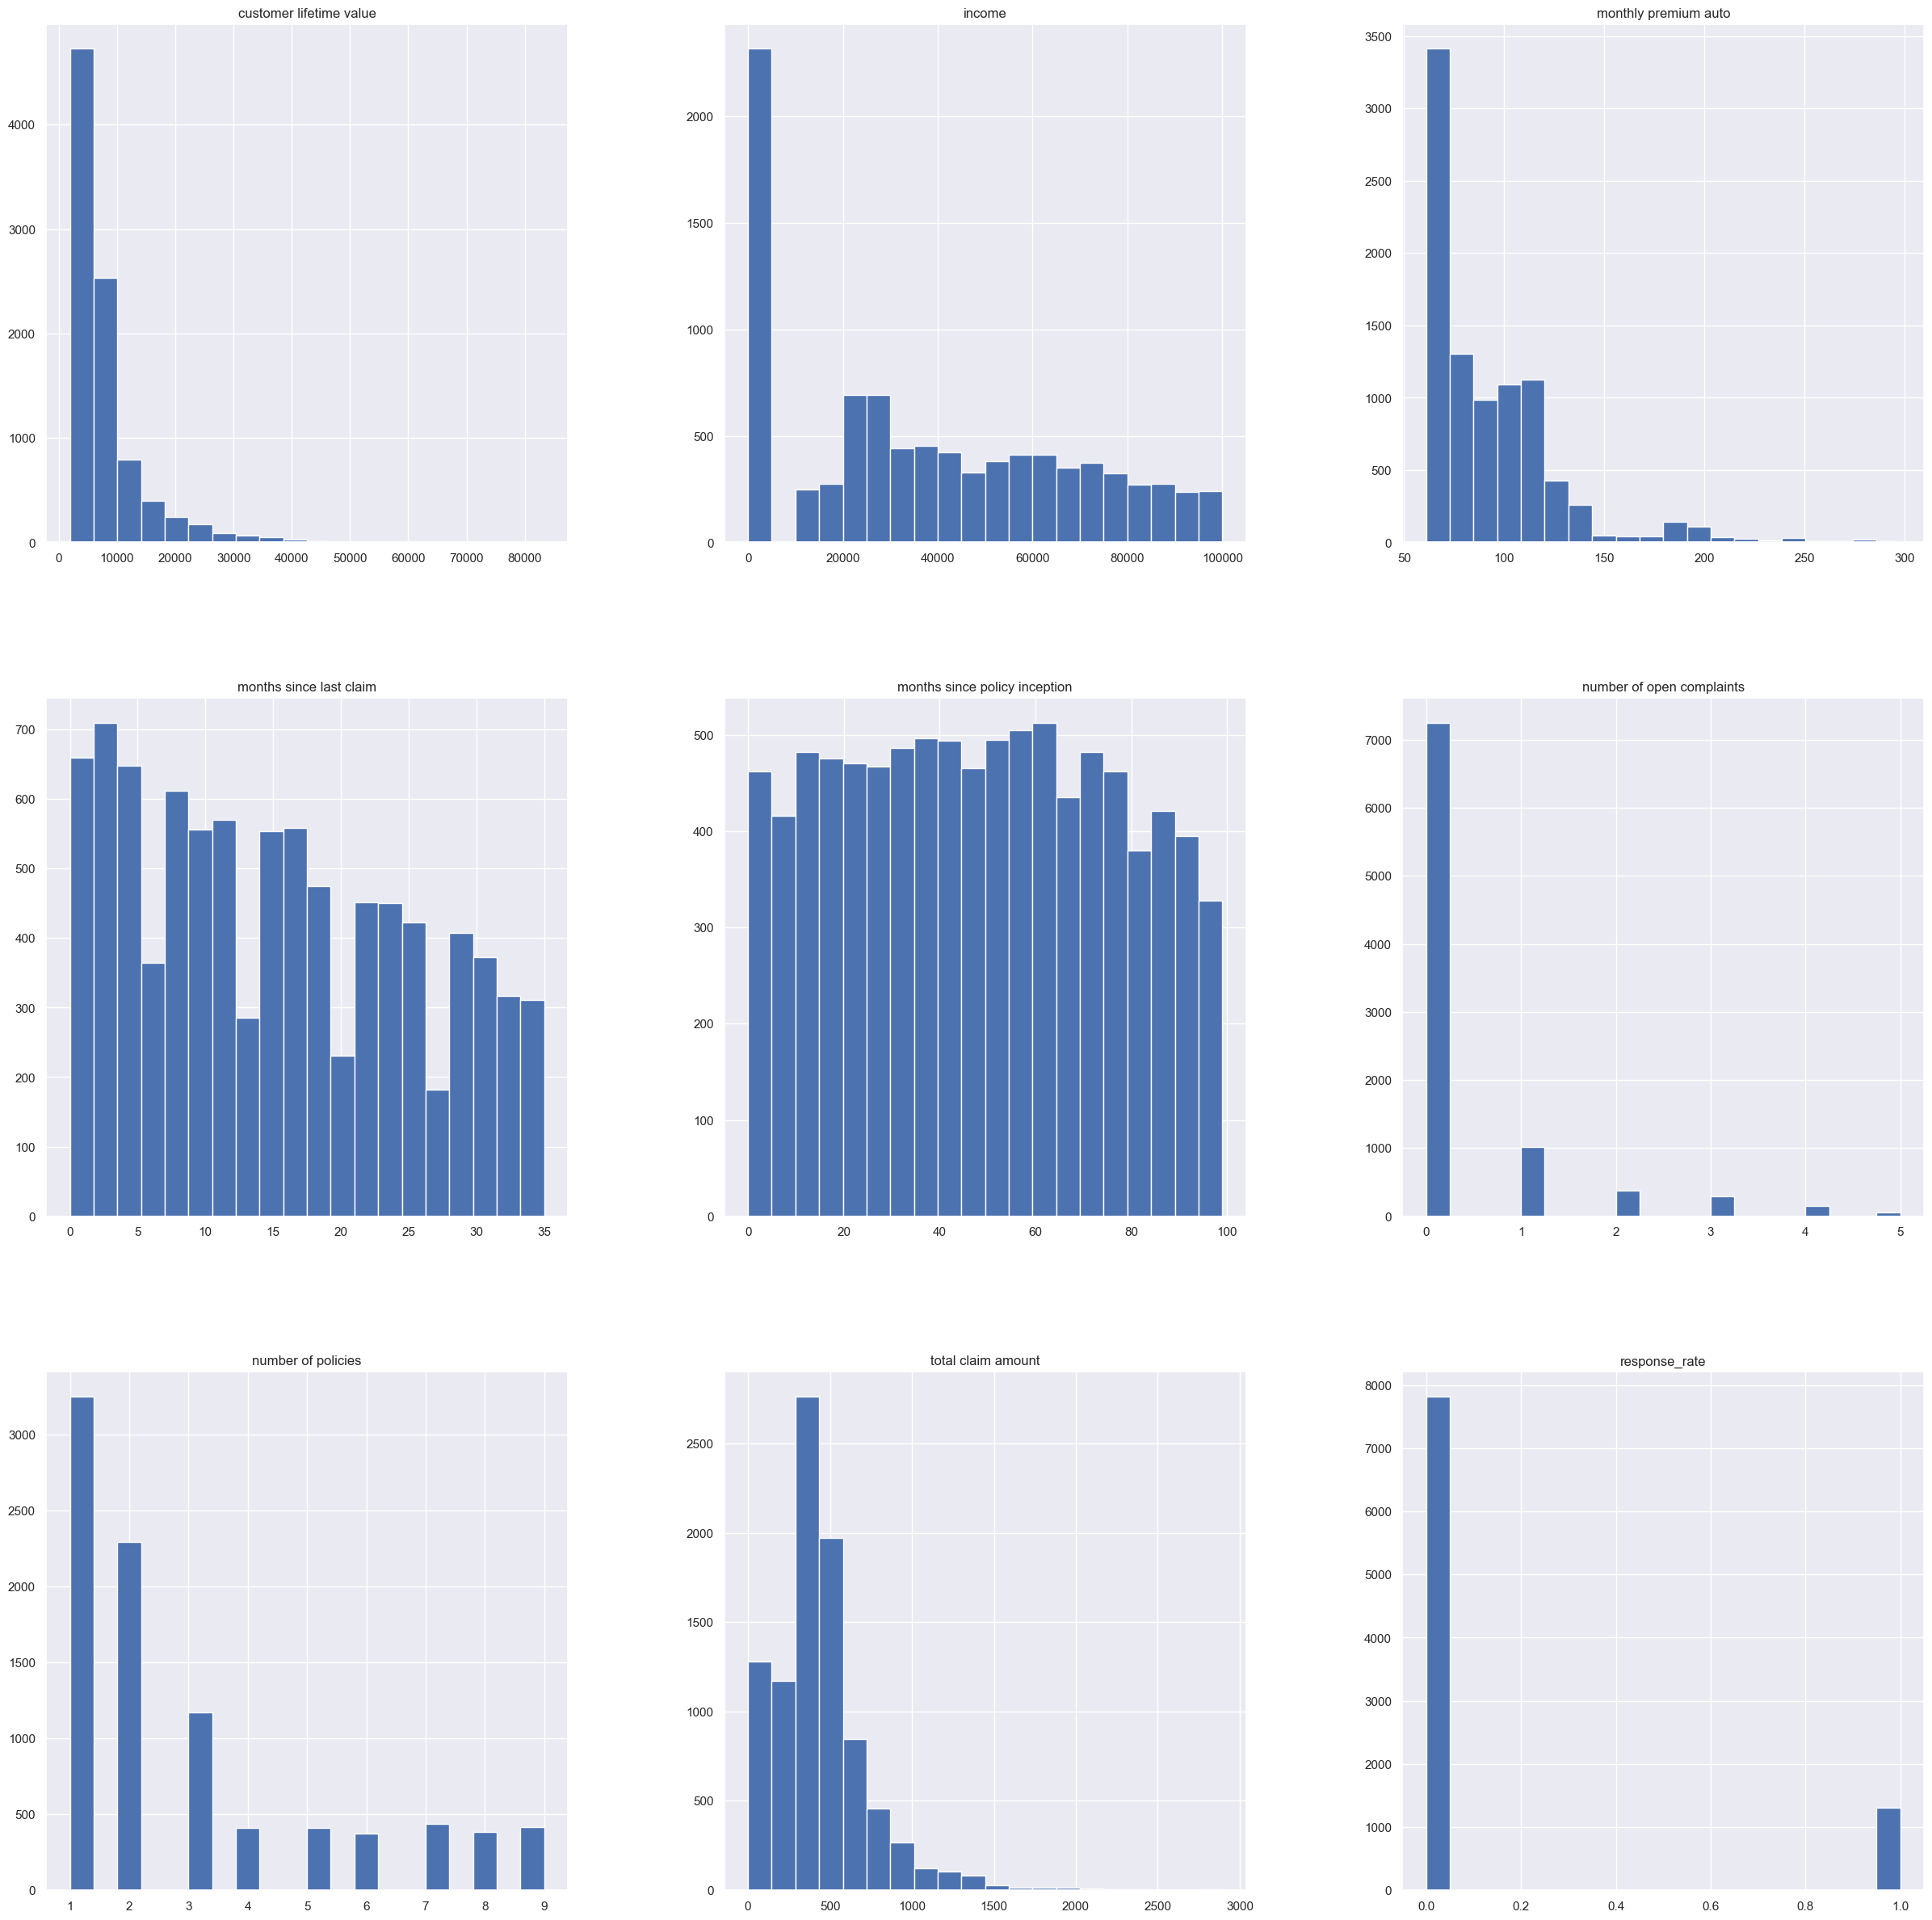

In [100]:
numerical.hist(bins=20)

plt.show()

In [105]:
numeric_cols=['customer lifetime value','income','monthly premium auto','months since last claim','months since policy inception','number of policies','total claim amoun','response_rate','number of open complaints']
minmax_scaler = MinMaxScaler()
numeric_data_minmax = minmax_scaler.fit_transform(numerical)

In [106]:
X_num_scld=pd.DataFrame(numeric_data_minmax, columns=numeric_cols)

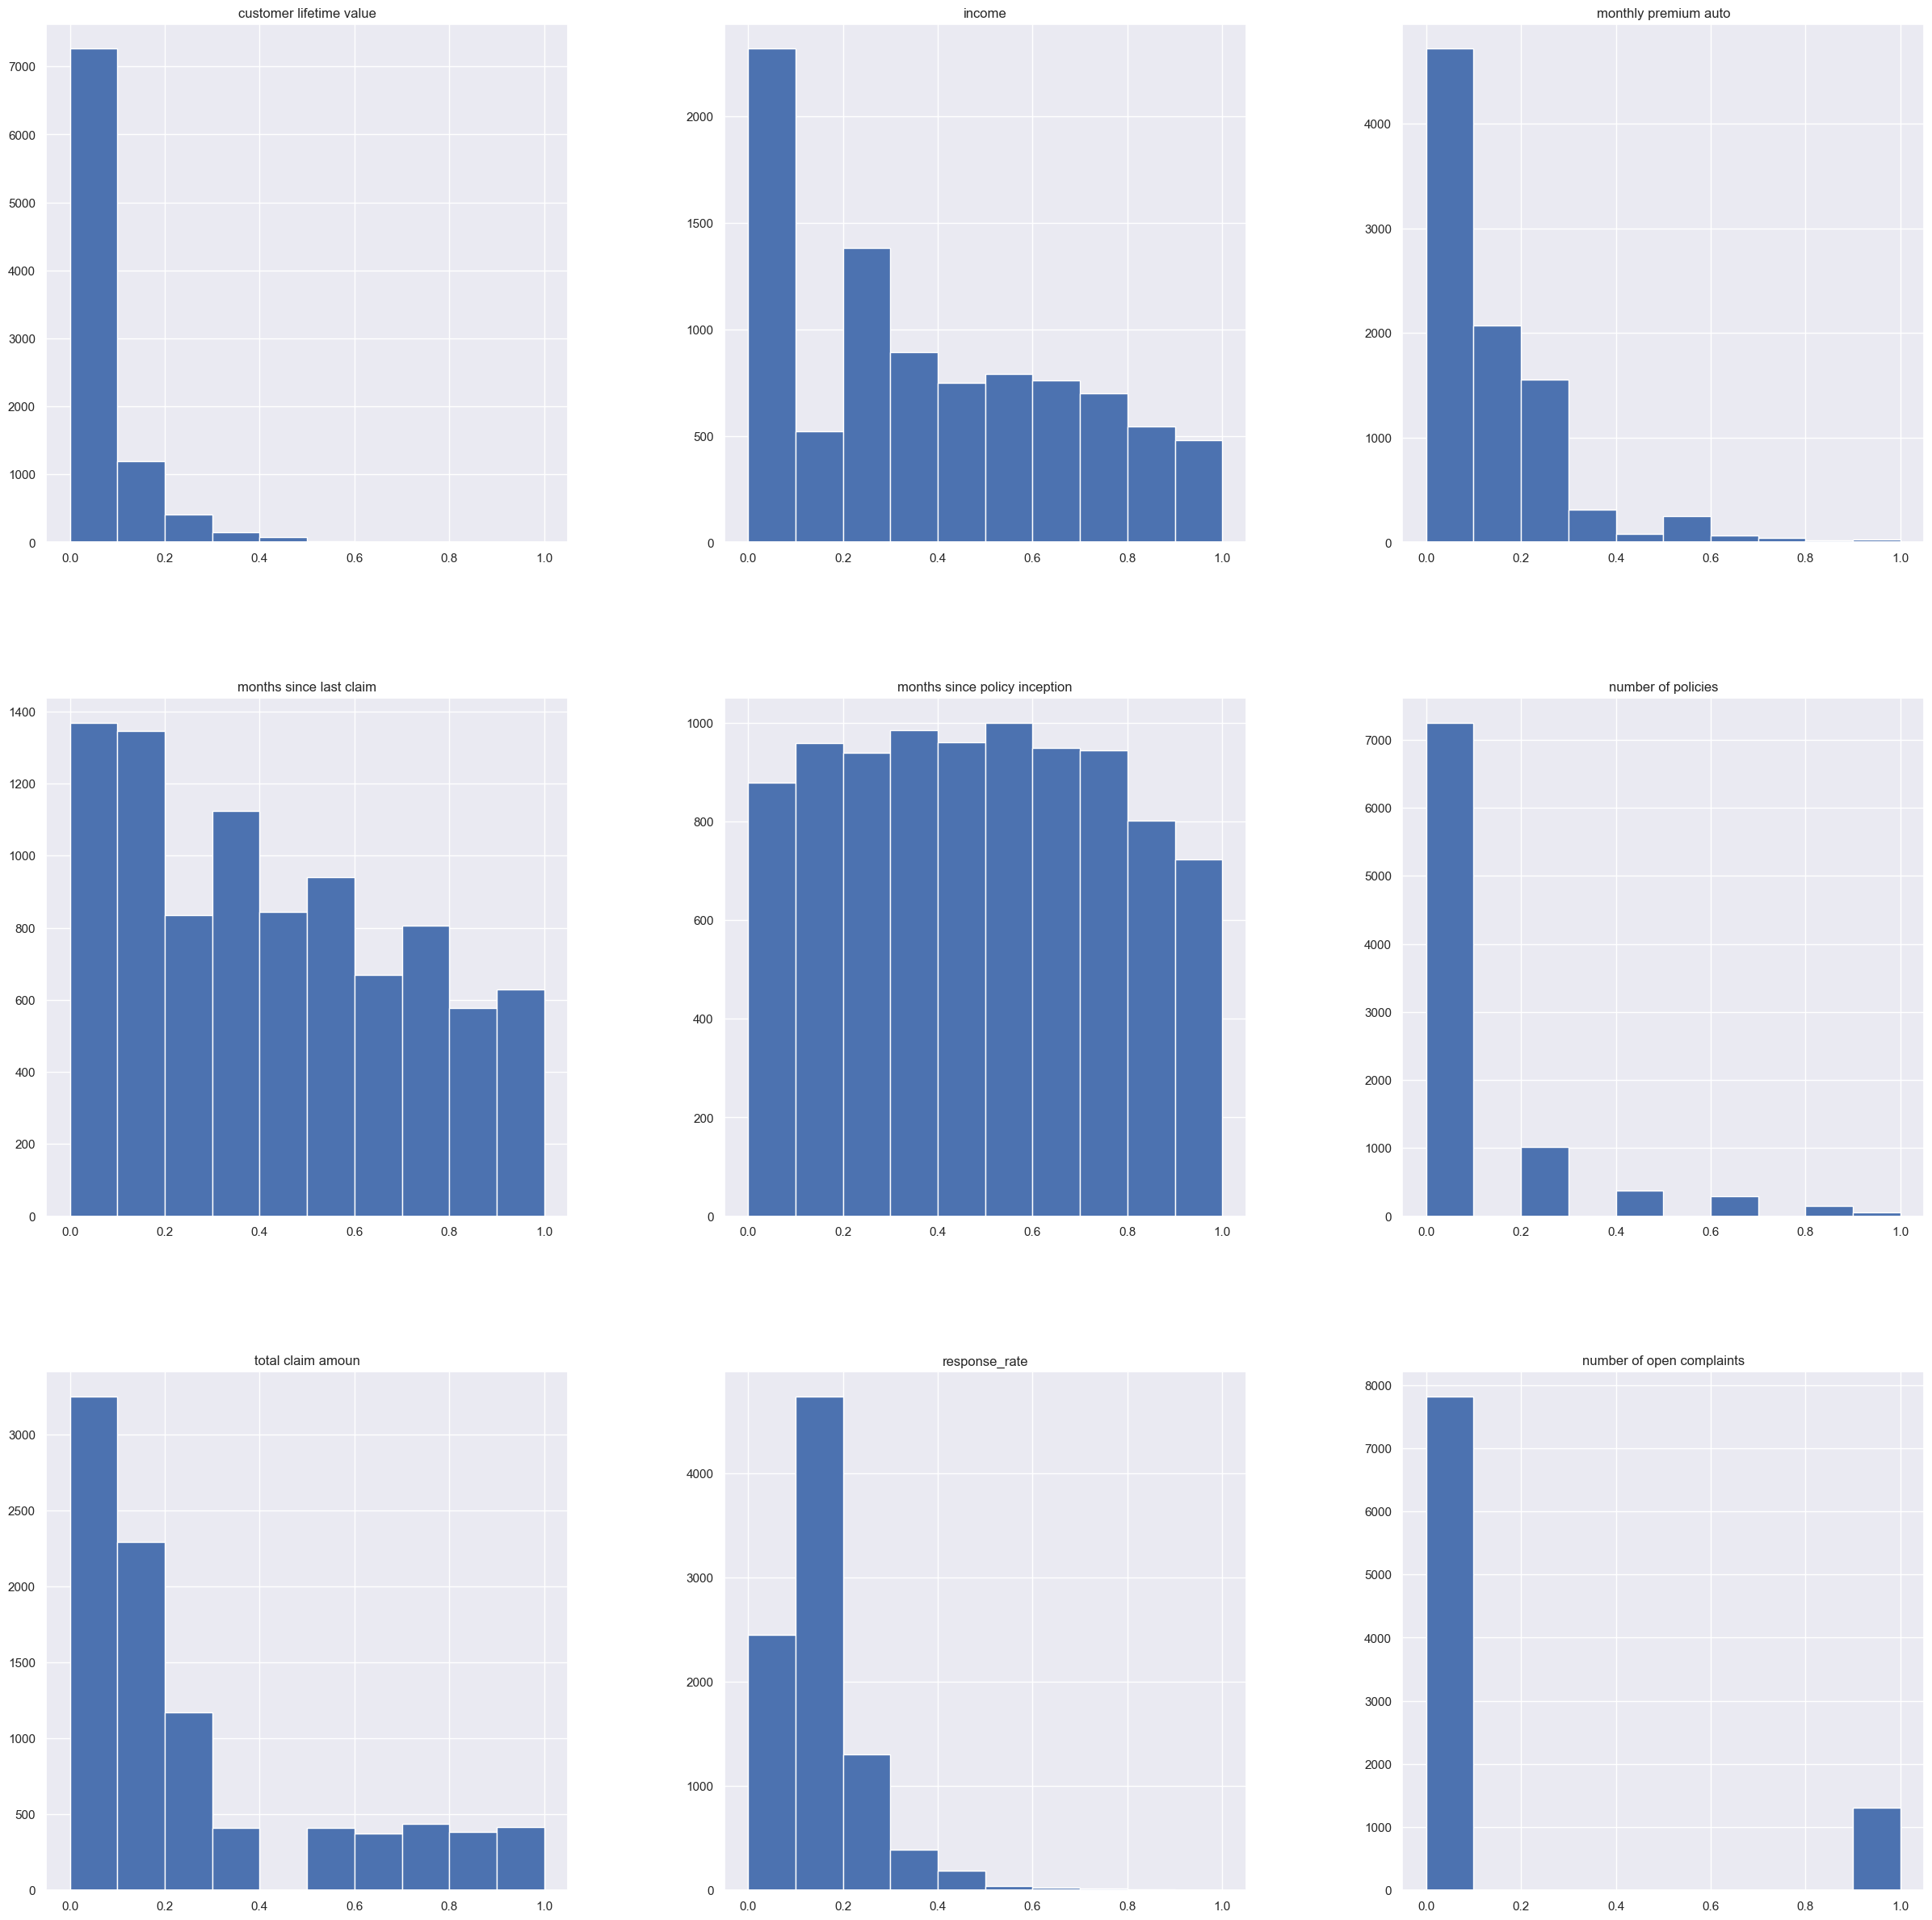

In [107]:
 pd.DataFrame(numeric_data_minmax, columns=numeric_cols).hist()
sns.set(rc={'figure.figsize':(20,20)})
plt.show()

In [108]:
## We scaled data to have a better vision and understading of data

#### One Hot/Label Encoding (categorical)

In [109]:
categorical.head()

,state,response,coverage,education,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,Month
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,February
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,January
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,February
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,January
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,February


In [114]:
### this code helps us change the data ('objects') to number 0 and 1. big thanks for queen Erin for this piece of code that saved my life

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(X_cat)

cols = encoder.get_feature_names_out(input_features=X_cat.columns)

X_cat_encode = pd.DataFrame(encoder.transform(X_cat).toarray(),columns=cols)

X_cat_encode.head()

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,...,sales channel_Call Center,sales channel_Web,vehicle class_Luxury Car,vehicle class_Luxury SUV,vehicle class_SUV,vehicle class_Sports Car,vehicle class_Two-Door Car,vehicle size_Medsize,vehicle size_Small,Month_January
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [116]:
## now we concat both dataframe, numerical which has been scaled and cat which has been encoded

Df=pd.concat([X_num_scld,X_cat_encode], axis=1)
Df

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of policies,total claim amoun,response_rate,number of open complaints,state_California,...,sales channel_Call Center,sales channel_Web,vehicle class_Luxury Car,vehicle class_Luxury SUV,vehicle class_SUV,vehicle class_Sports Car,vehicle class_Two-Door Car,vehicle size_Medsize,vehicle size_Small,Month_January
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.132974,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.391051,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.195764,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.183117,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0.047710,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0.264137,0.719547,0.050633,0.514286,0.898990,0.0,0.125,0.068485,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9130,0.014719,0.216081,0.075949,0.400000,0.282828,0.0,0.000,0.131034,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9131,0.076951,0.000000,0.101266,0.257143,0.373737,0.6,0.125,0.273297,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9132,0.069098,0.219452,0.147679,0.971429,0.030303,0.0,0.250,0.238876,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Train test our Data


In [117]:
# train test split is the way ML generates its claim to fame: 
# we build the model on a portion of the data but we then validate it in 
# another "fresh" portion
# our model has no opportunity to "cheat": it must accurately guess the values 
# in the "fresh" dataset that it never saw before

In [135]:
from sklearn.model_selection import train_test_split
import matplotlib
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [136]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6393, 8)
(2741, 8)
(6393,)
(2741,)


In [137]:
#we train/fit our model 

lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)


LinearRegression()

In [138]:
from sklearn.metrics import r2_score
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.518696962816062

In [139]:
# But now we evaluate it in the TEST portion of the data, that we did not use for training.
# This way we know our model is genuinely guessing our donations, not just repeating the values it has seen in the training data


predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

0.5183993503400512

In [140]:
y_test[:5]

3047    214.772284
603     612.102262
5270    451.200000
3362    312.000000
6644     46.464625
Name: total claim amount, dtype: float64

In [141]:
predictions_test[:5]

array([274.91609988, 633.09919787, 377.08111206, 142.88379409,
       482.07925194])

In [142]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,predictions_test)
mse

39064.65909673649

In [143]:
rmse = np.sqrt(mean_squared_error(y_test,predictions_test))
rmse

197.64781581574962

In [144]:
y_test.mean()

428.5117997369578

In [145]:
# to make predictions on the new data, 
# we have to process the data (X features) in the same way. 

#### Metrics 

In [146]:
from sklearn.metrics import mean_absolute_error, r2_score

In [147]:
mae = mean_absolute_error(y_test, predictions_test)
print(mae)

140.95280416256085


In [148]:
import math 

rmse = math.sqrt(mse)
print(rmse)

197.64781581574962


In [149]:
r2 = r2_score(y_test, predictions_test)
r2

0.5183993503400512